In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.association import covariance, correlation_pearson

## Setup

In [2]:
# Generator
random_state = 1923
rng1 = np.random.default_rng(random_state)
rng2 = np.random.default_rng(random_state + 1)

In [3]:
# Variables
lam = 5
size = 1000
x = rng1.poisson(lam, size)
y = rng2.poisson(lam, size)

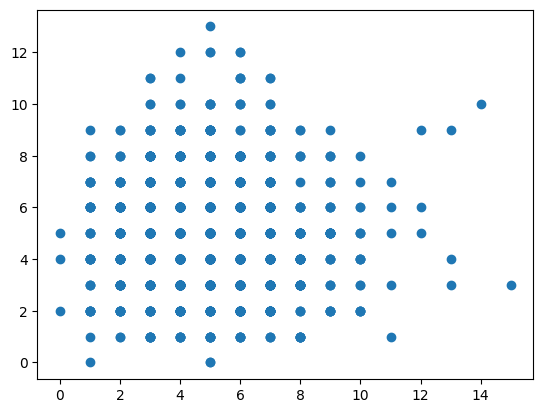

In [4]:
_ = plt.scatter(x, y)

## Manual calculation

In [5]:
df = pd.DataFrame({
    "x": x,
    "y": y
})

In [6]:
# Deviations from the mean
df.loc[:, "x - E(x)"] = df["x"] - df["x"].mean()
df.loc[:, "y - E(y)"] = df["y"] - df["y"].mean()

# Product of the deviations from the mean
df.loc[:, "product"] = df["x - E(x)"] * df["y - E(y)"]

In [7]:
df

,x,y,x - E(x),y - E(y),product
0,6,4,0.95,-0.993,-0.94335
1,3,3,-2.05,-1.993,4.08565
2,2,5,-3.05,0.007,-0.02135
3,7,4,1.95,-0.993,-1.93635
4,9,4,3.95,-0.993,-3.92235
...,...,...,...,...,...
995,3,4,-2.05,-0.993,2.03565
996,7,3,1.95,-1.993,-3.88635
997,2,6,-3.05,1.007,-3.07135
998,4,9,-1.05,4.007,-4.20735


In [8]:
# Covariance: Expected value(product(deviations from the mean))
covar = df["product"].mean()
covar

-0.07864999999999997

In [9]:
# Check against numpy covariance
np.cov(df[["x", "y"]], rowvar = False)[0, 1]

-0.07872872872872842

In [10]:
# Pearson correlation: Covariance / product(standard deviations)
pearson_corr = covar / (df.x.std() * df.y.std())
pearson_corr

-0.016510846905336326

In [11]:
# Check against numpy Pearson correlation
np.corrcoef(df[["x", "y"]], rowvar = False)[0, 1]

-0.016527374279615887

## Function implementation

In [12]:
covariance(x, y)

-0.07864999999999993

In [13]:
correlation_pearson(x, y)

-0.01652737427961594